<a href="https://colab.research.google.com/github/MDA1422/BIDM_Tasks/blob/main/BIDM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, HTML
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


Mounted at /content/drive



# **Task 1 Exploratory Data Analysis**

**1.1 Data Analysis**

This code performs a detailed data analysis of the Olist e-commerce dataset using Python's pandas, matplotlib, and seaborn libraries. It starts by loading multiple CSV files from a specified folder (/content/drive/MyDrive/olist_data) into a dictionary of dataframes. It then creates visualizations to analyze the data.
First, it analyzes the top 15 sellers by order share and total order count using bar charts. Next, it creates a line plot showing the trend of orders over time. The code also generates a count plot showing the distribution of review scores, a bar chart for payment types, and a histogram for payment installments.
For product data, it creates a heatmap showing the correlation between numerical product features, and for seller data, it creates a count plot showing the distribution of sellers by state. It further merges order and payment data to calculate the total revenue and order count per day, and then computes the Average Order Value (AOV) over time, displaying it using a line plot. Outliers are removed to avoid skewed results. This analysis provides insights into seller performance, customer reviews, payment trends, product characteristics, and sales performance over time.

This shows the top 15 sellers with the most orders compared to all the sellers.

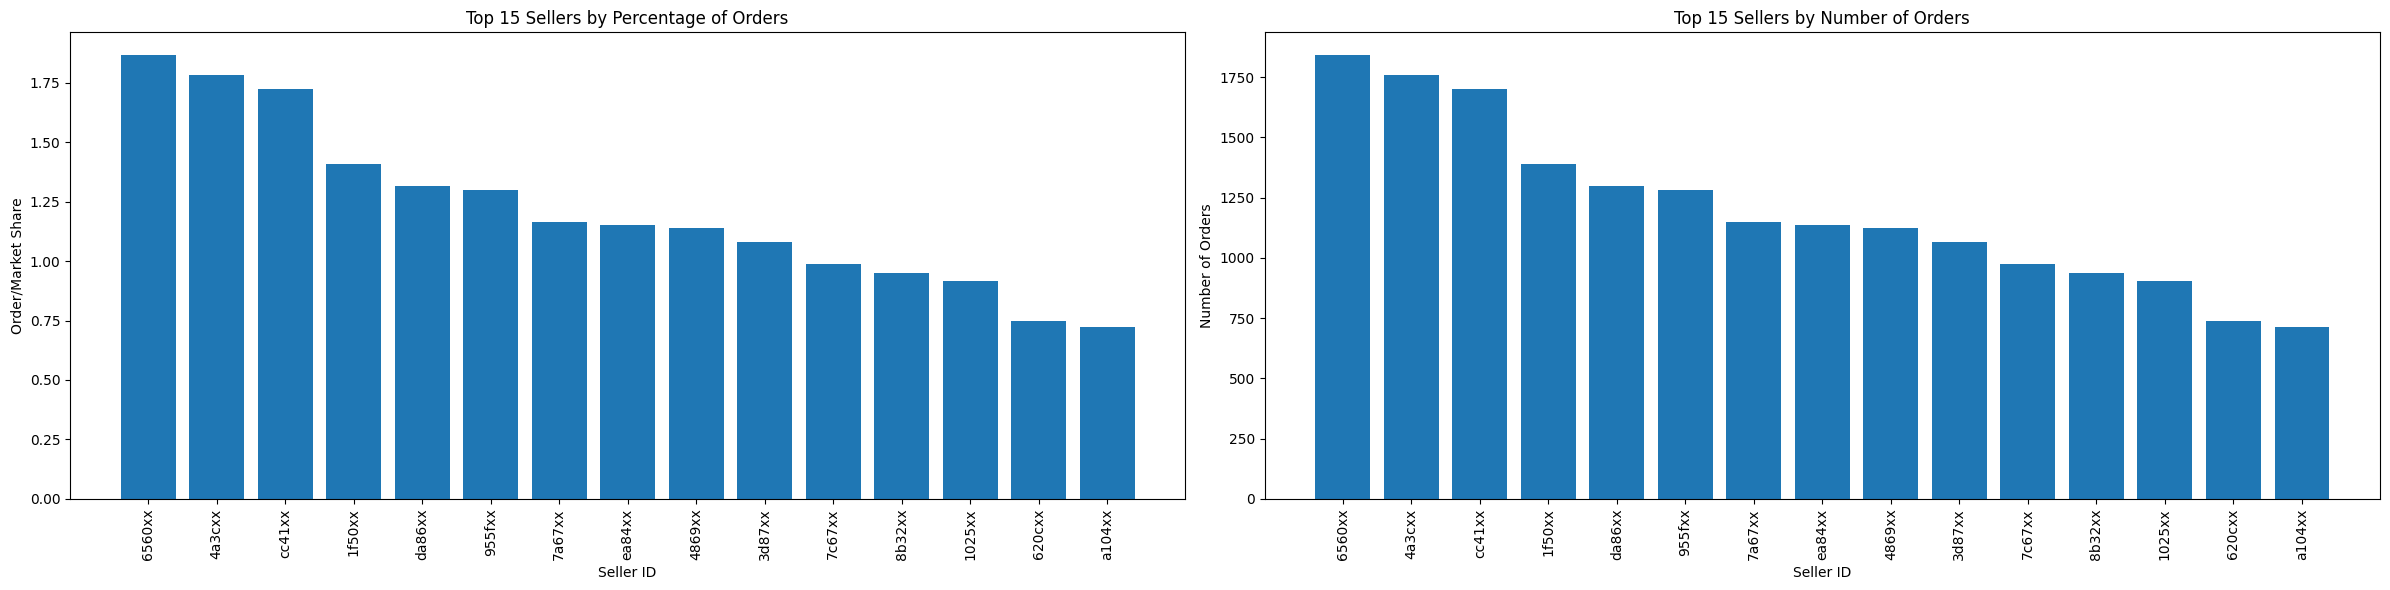

In [3]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_orders_dataset.csv']
order_items = dataframes['olist_order_items_dataset.csv']

unique_orders = order_items.drop_duplicates(subset=['order_id'])
seller_order_counts = unique_orders['seller_id'].value_counts()
c = seller_order_counts.head(15)

total_orders = seller_order_counts.sum()
top_15_percentages = (c / total_orders) * 100

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 2 columns

# Plot 1: Top 15 Sellers by Percentage of Orders
axes[0].bar(top_15_percentages.index.str[:4] + ['xx'], top_15_percentages.values)
axes[0].set_xlabel('Seller ID')
axes[0].set_ylabel('Order/Market Share')
axes[0].set_title('Top 15 Sellers by Percentage of Orders')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2: Top 15 Sellers by Number of Orders
axes[1].bar(c.index.str[:4] + ['xx'], c.values)
axes[1].set_xlabel('Seller ID')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Top 15 Sellers by Number of Orders')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



This section shows the distribution of payment types & installments & review scores and number of orders over time.

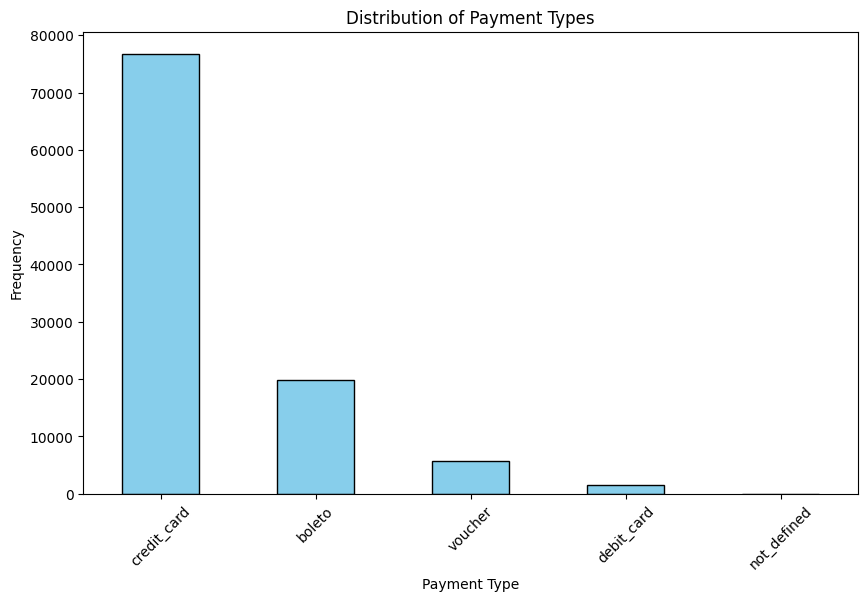

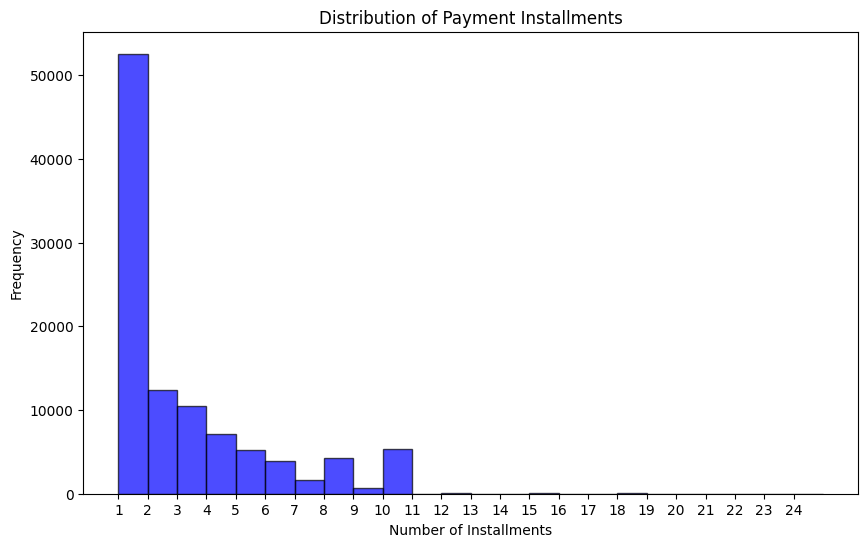

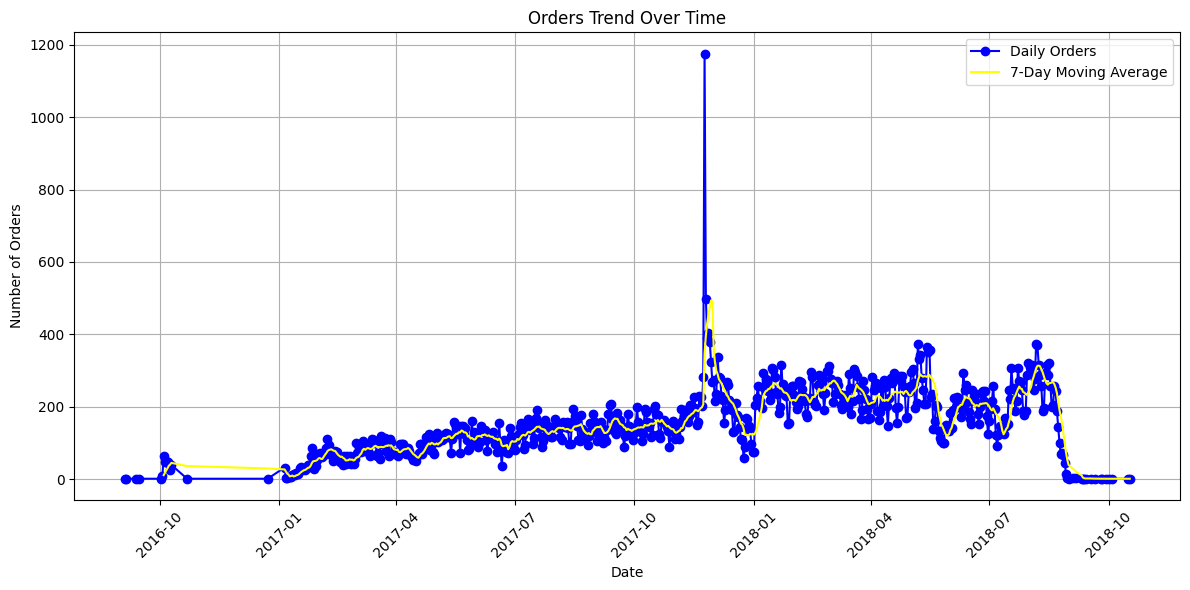

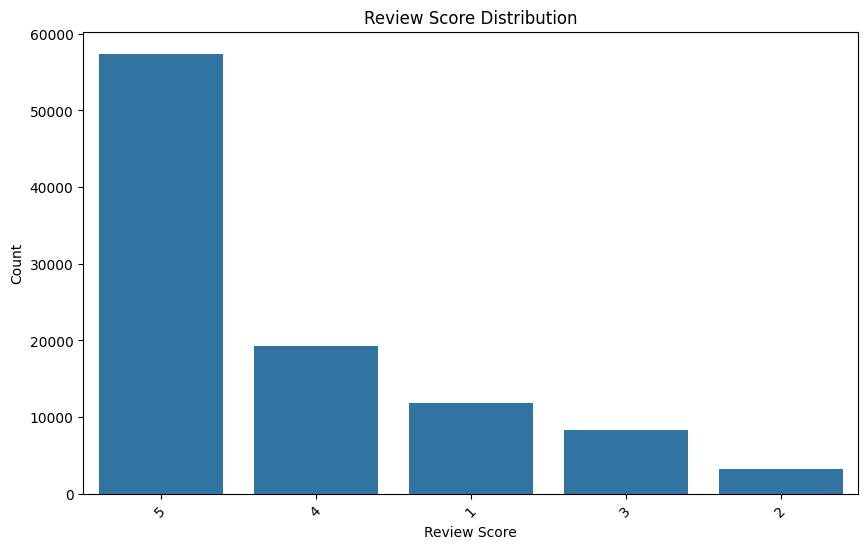

In [4]:

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        if filename == 'olist_orders_dataset.csv':
            dataframes[filename]['order_purchase_timestamp'] = pd.to_datetime(dataframes[filename]['order_purchase_timestamp'])

            # Group by date and count the number of orders
            orders_trend = dataframes[filename].groupby(dataframes[filename]['order_purchase_timestamp'].dt.date).size()

            # Calculate the rolling average (7-day moving average)
            avg_orders_trend = orders_trend.rolling(window=7).mean()

            # Create a line chart
            plt.figure(figsize=(12, 6))
            plt.plot(orders_trend.index, orders_trend.values, marker='o', linestyle='-', color='blue', label='Daily Orders')
            plt.plot(avg_orders_trend.index, avg_orders_trend.values, linestyle='-', color='yellow', label='7-Day Moving Average')

            plt.title('Orders Trend Over Time')
            plt.xlabel('Date')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45)
            plt.grid()
            plt.legend()
            plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
            plt.show()

        elif filename == 'olist_order_reviews_dataset.csv':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=dataframes[filename], x='review_score', order=dataframes[filename]['review_score'].value_counts().index)
            plt.title('Review Score Distribution')
            plt.xlabel('Review Score')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_order_payments_dataset.csv':

            # distribution of payment types
            payment_type_counts = dataframes[filename]['payment_type'].value_counts()
            plt.figure(figsize=(10, 6))
            payment_type_counts.plot.bar(color='skyblue', edgecolor='black')
            plt.title('Distribution of Payment Types')
            plt.xlabel('Payment Type')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()


           # distribution of payment installments
            plt.figure(figsize=(10, 6))
            plt.hist(dataframes[filename]['payment_installments'], bins=range(1, dataframes[filename]['payment_installments'].max() + 2), alpha=0.7, color='blue', edgecolor='black')
            plt.title('Distribution of Payment Installments')
            plt.xlabel('Number of Installments')
            plt.ylabel('Frequency')
            plt.xticks(range(1, dataframes[filename]['payment_installments'].max() + 1))
            plt.show()


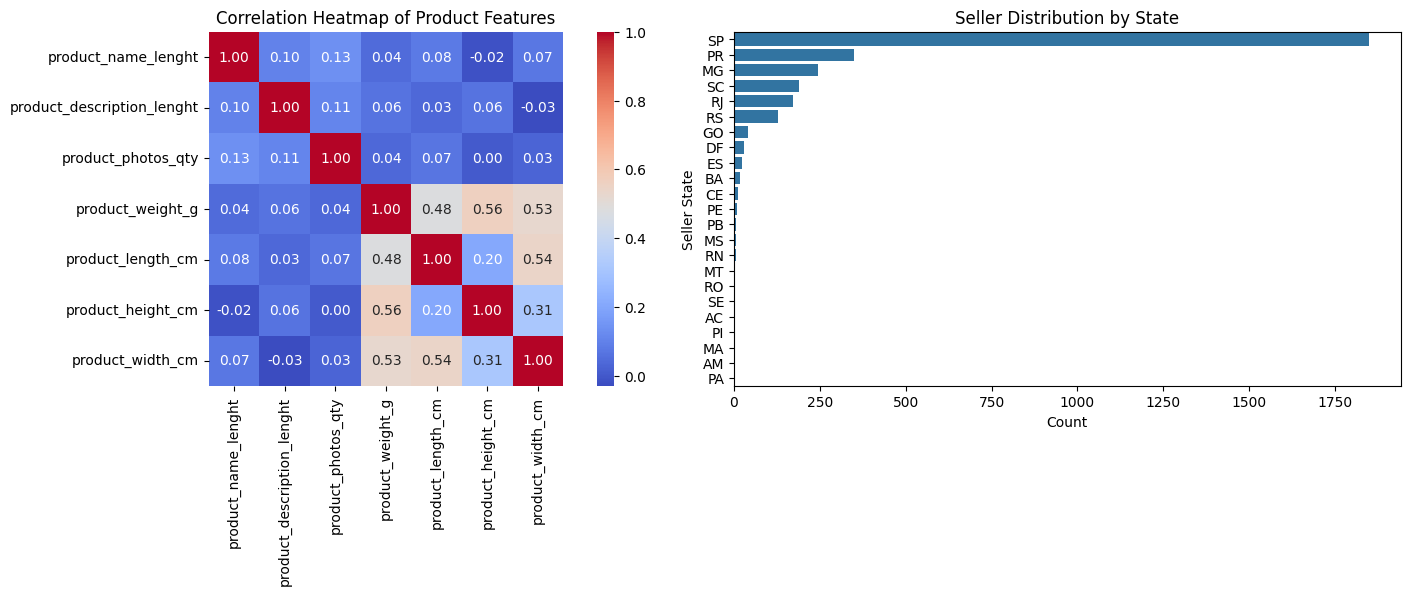

In [5]:

dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)
        df = pd.read_csv(file_path, encoding='latin-1')
        dataframes[filename] = df

        if filename == 'olist_products_dataset.csv':
          numerical_df = dataframes[filename].select_dtypes(include=['number'])
          correlation_matrix = numerical_df.corr()

        elif filename == 'olist_sellers_dataset.csv':
          pass  # Placeholder for the second chart data

# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Plot the correlation heatmap on the first subplot (axes[0])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap of Product Features')

# Plot the seller distribution on the second subplot (axes[1])
sns.countplot(data=dataframes['olist_sellers_dataset.csv'], y='seller_state',
              order=dataframes['olist_sellers_dataset.csv']['seller_state'].value_counts().index,
              ax=axes[1])
axes[1].set_title('Seller Distribution by State')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Seller State')

# Adjust layout and display the plots
plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

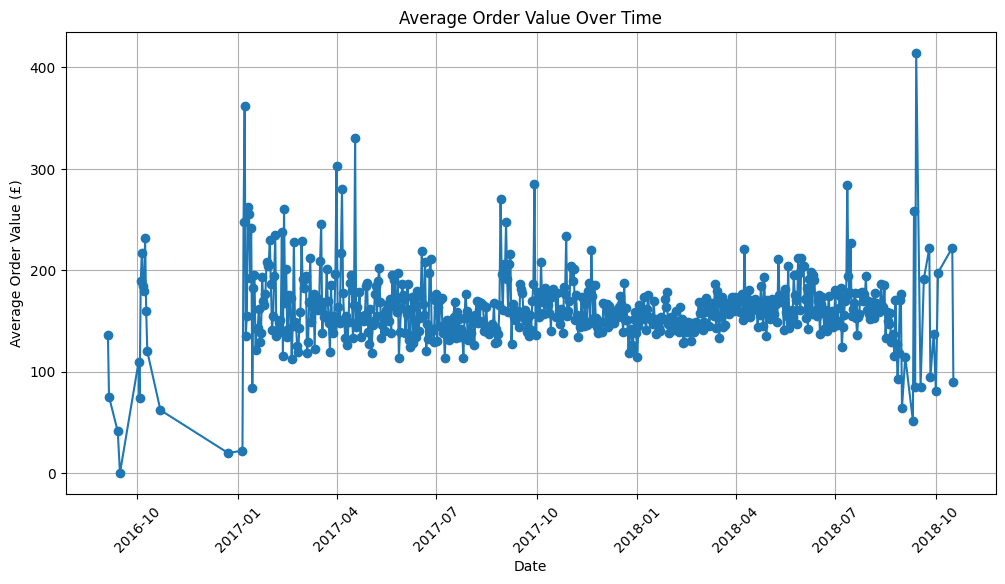

In [6]:


datasets_path = '/content/drive/MyDrive/olist_data' # Define the path to your datasets

# Load datasets using the correct path
orders_df = pd.read_csv(os.path.join(datasets_path, 'olist_orders_dataset.csv')) # Use os.path.join to create the full file path
payments_df = pd.read_csv(os.path.join(datasets_path, 'olist_order_payments_dataset.csv')) # Use os.path.join to create the full file path

# Convert timestamps to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Aggregate total payment per order (some orders may have multiple payments)
order_payments = payments_df.groupby('order_id', as_index=False)['payment_value'].sum()

# Merge orders with aggregated payment data
orders_payments_df = orders_df.merge(order_payments, on="order_id", how="left")

# Aggregate total revenue and order count per day
revenue_orders_over_time = orders_payments_df.groupby(orders_payments_df['order_purchase_timestamp'].dt.date).agg(
    total_revenue=('payment_value', 'sum'),  # Total revenue per day
    total_orders=('order_id', 'count')       # Total orders per day
)

# Calculate Average Order Value (AOV) per day
revenue_orders_over_time['average_order_value'] = revenue_orders_over_time['total_revenue'] / revenue_orders_over_time['total_orders']

# Remove outliers (Optional: If some days have extreme values)
revenue_orders_over_time = revenue_orders_over_time[revenue_orders_over_time['average_order_value'] < 500]

# Plot AOV over time
plt.figure(figsize=(12, 6))
plt.plot(revenue_orders_over_time.index, revenue_orders_over_time['average_order_value'], marker='o', linestyle='-')

# Formatting the chart
plt.xlabel('Date')
plt.ylabel('Average Order Value (£)')
plt.title('Average Order Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

# **Output Intepretations for Task 1.1**

# 1. Top 15 sellers by number/percentage of orders

**Observations:**

The data reveals a highly concentrated marketplace where a small number of top sellers dominate both in terms of order share and absolute order volume. The leading seller accounts for approximately 1.75% of total orders (representing about 1,750 transactions), with subsequent sellers showing rapidly declining shares and volumes (1.50%/1,500 orders, 1.25%/1,250 orders, etc.).


# 2. Distribution of Payment Types - Bar chart

**Observations:**

Based on the bar chart, credit card dominate other payment types, with nearly 75000+ transactions. In the meantime, Boleto (Brazilian bank slip) is second most popular payment method, it has around 20000 transactions. Unfortunately, voucher and debit card have a lower usage. From the chart, we can summarise that customers prefer to pay via credit card, mostlikely due to payment installments or convienience. Moreover, there is also a significant portion of customers still rely on offline or bank-based payment method, possibility due to lack of credit cards or preference for cash transactions.

**Business Suggestions:**

*   Promote Credit Card Payment for greater market reach
    
    Since credit card usage is the highest, Olist could establish/ strengthen partnerships with banks and fintech companies to offer exclusive discounts, cashback offers and better installment plans. Olist could also explore "Buy Now, Pay Later" (BNPL) options to increase conversions among low-income customers.

*   Increase trust in digital payments for traditional users

    The boleto payment still has high demand, could be due to the lack of trust in digital payments. To resolve this, Olist could educate customers about the safety of online payments and introduce "pay on delivery" or hybrid payment options.

*   Increase voucher adoptions

    Olist could provide personalized discounts, cashback programs, or loyalty rewards for customers who are using vouchers. Collaborating with companies could offer corporate benefit programs to incrase voucher usage.

# 3. Distribution of Payment Installments - Bar chart

**Observations:**

The charts shows that most customer prefer single payment followed by 2-6 installment plans which are also commonly used. However, installment plans beyond 10 months are rarely chosen. This reason is either seller do not offer customers or they want to avoid long commitment due to higher interest rates. This could hinder customers from buying high value products from Olist.

**Business Suggestions:**

*   Offer incentives/ benefits for installment usage

    Olist could offer discounts or cashback for installment-based payments to encourage more frequent and higher value purchases. Partnering with banks can help reduce interest rates on extended plans. Besides that, Olist could offer interest-free installment options (for up to 6 months) can encourage purchases.

*   Target high-installment users with premium offers

    Customers using 6+ installment plans may be high-value buyers looking for premium products.Olist should identify and target these customers with exclusive promotions or loyalty rewards.

# 4. Orders Trend Over Time -Time Series Chart

**Observations:**

The order trend shows a steady increase in daily orders from late 2016 to 2017, followed by a spike in late 2017, likely due to a seasonal event such as Black Friday or Christmas promotion. After this peak, the number of orders decreased but remained at a higher baseline than before, indicating some customer retention. Throughout 2018, there were fluctuations with smaller peaks, showed that there is recurring sales events, but a sharp decline occurred in late 2018.


**Business Suggestions:**

*   Leverage Seasonal Sales for Growth

    Since there is a huge spike in late 2017, Olist should plan  aggressive promotions around Black Friday and other major seasonal events such as Christmas. Offering time-limited discounts and installment options can help also sustain post-sale engagement.

*   Implement customer-retension strategies

    Orders dropped after the peak, could be indicating customers may not have returned. Launching retention campaigns (emails, discounts, loyalty rewards) could retain seasonal buyers.


# 5. Review Score Distribution - Bar Chart

**Observations:**

In the bar chart, most customers left a review score of 5 (the highest score), indicating that a large propotion of customers are highly satisfied with their purchases. Moving on, there is a noticeable drop between scores of 5 and 4, and the number of reviews decreases progressively with lower scores. This suggests that fewer customers are moderately satisfied or dissatisfied. There is still a small faction of customers were highly disastified, giving a review score of 2 and 1. Olist should take note of that.


# 6. Correlation of Product Features - HeatMap
    
**Observations:**

The correlation heatmap reveals that product weight is moderately correlated with product dimensions (length, width, and height), suggesting that heavier products tend to have larger sizes. Product length and width also show a moderate positive correlation, indicating that longer products are likely to be wider. However, product name length, description length, and photo quantity show weak or no correlation with product size or weight, indicating that product listing details are independent of physical attributes.

**Business Suggestions:**

*   Optimize shipping cost based on product size

    Since product dimensions (length, width, height) are moderately correlated with product weight, Olist can use this information to optimize shipping costs by predicting weight based on dimensions. Olist could group products by weight and dimensions to reduce packaging and shipping costs.


# 7. Seller Distribution by State - Bar Chart

**Observations:**

The bar chart shows that the majority of sellers on Olist are concentrated in São Paulo (SP), with a significantly higher count compared to other states. Paraná (PR) and Minas Gerais (MG) follow next, but with notably smaller seller bases. The distribution drops sharply beyond the top three states, indicating that seller activity is heavily centralized in a few regions.

**Business Suggestions:**

*   Recruit more seller in underserved states

    Since São Paulo (SP) has a  higher number of sellers, Olist should focus on recruiting sellers from underrepresented states like Amazonas (AM), Maranhão (MA), and Paraíba (PB). Targeted outreach campaigns, incentives (e.g., lower commission rates, free promotional tools), and localized support can encourage sellers from these regions to join the platform.

*   Partnerships with Local Logistics Providers

    Partnering with local delivery services in remote states can improve efficiency and reduce costs. This can make it more attractive for sellers from underserved states to join the platform, thereby improving geographical diversity.
    
*   Provide incentives for local sellers

    Seller from underrepresented states decided to not sell online could be due to high platform fees and commission tax. To encorage sellers to sell on Olist, providing bonuses and lower platform fees & commission tax will do.


# 7. Average order value over time

**Observations**

The chart illustrates the trend of Average Order Value (AOV) from 2016 to 2023, showing initial growth from around £100 in 2016 to a peak of approximately £400, followed by fluctuations and a subsequent decline. The steady rise in AOV between 2016 and 2019 suggests effective strategies such as upselling, premium product introductions, or improved customer spending habits. However, the volatility observed from 2020 onward—marked by sharp peaks and dips—likely reflects external factors like the pandemic's impact, economic shifts, or changes in consumer behavior. The recent decline from peak values may indicate growing price sensitivity or a shift toward smaller purchases.



**1.2  Summary of the data and Missing Values**

This code performs data summarization and cleaning of the Olist dataset for Task 1.2 by loading CSV files from a specified path (datasets_path) into a dictionary of dataframes (dataframes). It reads the CSV files using the latin-1 encoding (if utf-8 fails) and then checks for missing values, displaying the count if any are found. It summarizes each dataset using describe() to give an overview of statistical properties (like mean, min, max, etc.) for all columns. If a column name contains 'date' or 'time', it tries to convert it to a datetime format. Categorical columns are identified and listed, while numerical columns are checked for minimum and maximum values to detect potential scaling issues. The code also drops duplicate rows and checks for invalid values like negative numbers in numeric fields. A function remove_outliers_iqr() is defined to remove outliers based on the Interquartile Range (IQR) method for numerical columns.

In [7]:

datasets_path = '/content/drive/MyDrive/olist_data'


def remove_outliers_iqr(df, numerical_cols):
          for col in numerical_cols:
              Q1 = df[col].quantile(0.25)
              Q3 = df[col].quantile(0.75)
              IQR = Q3 - Q1
              lower_bound = Q1 - 1.5 * IQR
              upper_bound = Q3 + 1.5 * IQR

              # Remove outliers
              initial_shape = df.shape
              df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
              if df.shape != initial_shape:
                  print(f'Removed outliers from {col} using IQR method in {filename}.')

          return df

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame, specifying the encoding
        # Try 'latin-1' or 'ISO-8859-1' if 'utf-8' doesn't work
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Check for missing values
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f'{filename} has {missing_values} missing values.')
        else:
            print(f'{filename} has no missing values.')

        # Summarize the data
        print(f'\nSummary of {filename}:')
        display(df.describe(include='all'))

        # Check for timestamp data type and convert if necessary
        for col in df.columns:
            if 'date' in col.lower() or 'time' in col.lower():
                try:
                    df[col] = pd.to_datetime(df[col])
                    print(f'Converted {col} to datetime in {filename}.')
                except Exception as e:
                    print(f'Failed to convert {col} in {filename}. Error: {e}')

        # Check for categorical data
        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        if categorical_cols:
            print(f'Categorical columns in {filename}: {categorical_cols}')

        # Plotting distribution of numerical features
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


        # Check if feature scaling is needed
        if numerical_cols:
            for col in numerical_cols:
                min_val = df[col].min()
                max_val = df[col].max()
                print(f'{col} in {filename} has min: {min_val}, max: {max_val}')

        # Additional pre-processing steps
        # Dropping duplicates
        initial_shape = df.shape
        df.drop_duplicates(inplace=True)
        if df.shape != initial_shape:
            print(f'Dropped duplicates in {filename}.')

        # Checking for noise (e.g., negative values where not expected)
        for col in numerical_cols:
            if (df[col] < 0).any():
                print(f'Noise detected: Negative values in {col} of {filename}.')


        for filename, df in dataframes.items():
            numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
            df = remove_outliers_iqr(df, numerical_cols)
            dataframes[filename] = df


olist_customers_dataset.csv has no missing values.

Summary of olist_customers_dataset.csv:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Categorical columns in olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']
customer_zip_code_prefix in olist_customers_dataset.csv has min: 1003, max: 99990
olist_geolocation_dataset.csv has no missing values.

Summary of olist_geolocation_dataset.csv:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Categorical columns in olist_geolocation_dataset.csv: ['geolocation_city', 'geolocation_state']
geolocation_zip_code_prefix in olist_geolocation_dataset.csv has min: 1001, max: 99990
geolocation_lat in olist_geolocation_dataset.csv has min: -36.6053744107061, max: 45.06593318269697
geolocation_lng in olist_geolocation_dataset.csv has min: -101.46676644931476, max: 121.10539381057764
Dropped duplicates in olist_geolocation_dataset.csv.
Noise detected: Negative values in geolocation_lat of olist_geolocation_dataset.csv.
Noise detected: Negative values in geolocation_lng of olist_geolocation_dataset.csv.
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
olist_order_payments_dataset.csv has no missing values.

Summary of olist_order_payments_dataset.csv:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Categorical columns in olist_order_payments_dataset.csv: ['order_id', 'payment_type']
payment_sequential in olist_order_payments_dataset.csv has min: 1, max: 29
payment_installments in olist_order_payments_dataset.csv has min: 0, max: 24
payment_value in olist_order_payments_dataset.csv has min: 0.0, max: 13664.08
Removed outliers from geolocation_zip_code_prefix using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_sequential using IQR method in olist_order_payments_dataset.csv.
Removed outliers from payment_installments using IQR method in olist_order_payments_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
olist_order_items_dataset.csv has no missing values.

Summary of olist_order_items_dataset.csv:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Converted shipping_limit_date to datetime in olist_order_items_dataset.csv.
Categorical columns in olist_order_items_dataset.csv: ['order_id', 'product_id', 'seller_id']
order_item_id in olist_order_items_dataset.csv has min: 1, max: 21
price in olist_order_items_dataset.csv has min: 0.85, max: 6735.0
freight_value in olist_order_items_dataset.csv has min: 0.0, max: 409.68
Removed outliers from geolocation_zip_code_prefix using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_installments using IQR method in olist_order_payments_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from order_item_id using IQR method in olist_order_items_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_datas

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Converted order_purchase_timestamp to datetime in olist_orders_dataset.csv.
Converted order_delivered_carrier_date to datetime in olist_orders_dataset.csv.
Converted order_delivered_customer_date to datetime in olist_orders_dataset.csv.
Converted order_estimated_delivery_date to datetime in olist_orders_dataset.csv.
Categorical columns in olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_approved_at']
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from geolocation_lng using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from freight_value using IQR method in olist_order_items_dataset.csv.
olist_products_dataset.csv has 2448 missing values.

Summary of olist_products_dataset.csv:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Categorical columns in olist_products_dataset.csv: ['product_id', 'product_category_name']
product_name_lenght in olist_products_dataset.csv has min: 5.0, max: 76.0
product_description_lenght in olist_products_dataset.csv has min: 4.0, max: 3992.0
product_photos_qty in olist_products_dataset.csv has min: 1.0, max: 20.0
product_weight_g in olist_products_dataset.csv has min: 0.0, max: 40425.0
product_length_cm in olist_products_dataset.csv has min: 7.0, max: 105.0
product_height_cm in olist_products_dataset.csv has min: 2.0, max: 105.0
product_width_cm in olist_products_dataset.csv has min: 6.0, max: 118.0
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from freight_value using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_name_lenght 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Categorical columns in olist_sellers_dataset.csv: ['seller_id', 'seller_city', 'seller_state']
seller_zip_code_prefix in olist_sellers_dataset.csv has min: 1001, max: 99730
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_name_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_height_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_width_cm using IQR method in olist_products_dataset.csv.
product_category_name_translatio

,ï»¿product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Categorical columns in product_category_name_translation.csv: ['ï»¿product_category_name', 'product_category_name_english']
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from payment_value using IQR method in olist_order_payments_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_width_cm using IQR method in olist_products_dataset.csv.
olist_order_reviews_dataset.csv has 146542 missing values.

Summary of olist_order_reviews_dataset.csv:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41743,100000,100000
unique,99173,99441,NaN,4588,36046,637,89500
top,e44840754f12fad2b8646712121b349a,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Good,19/12/2017 00:00,12/08/2017 14:35
freq,3,3,NaN,426,375,466,6
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


<ipython-input-7-42fc89b03544>:48: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-7-42fc89b03544>:48: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])


Converted review_creation_date to datetime in olist_order_reviews_dataset.csv.
Converted review_answer_timestamp to datetime in olist_order_reviews_dataset.csv.
Categorical columns in olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_comment_title', 'review_comment_message']
review_score in olist_order_reviews_dataset.csv has min: 1, max: 5
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_height_cm using IQR method in olist_products_dataset.csv.
Removed outliers from review_score using IQR method in olist_order_reviews_dataset.csv.


**1.3 Timestamp Data**

The goal of this code is to load all CSV files from the specified datasets_path directory into a dictionary of Pandas dataframes, where the filename serves as the key. It reads the files with latin-1 encoding to properly handle any special characters. Once the data is loaded, the code iterates through each dataframe and its columns to identify columns that contain the word "timestamp" (case-insensitive). If such columns are found, the code uses the display() function with HTML styling to output the filename and column name in blue-colored text. This allows for quick identification and visualization of any timestamp columns across multiple datasets, helping users efficiently locate and analyze time-related data.

In [8]:
datasets_path = '/content/drive/MyDrive/olist_data'
dataframes = {}
for filename in os.listdir(datasets_path):
  if filename.endswith('.csv'):
    file_path = os.path.join(datasets_path, filename)
    df = pd.read_csv(file_path, encoding='latin-1')
    dataframes[filename] = df


for filename, df in dataframes.items():
       for column in df.columns:
           if 'timestamp' in column.lower():
               # Apply HTML styling for blue text
               display(HTML(f"<span style='color:blue;'>{filename}: {column}</span>"))

# Task 2 Customer Segmentation

##**Segment 1 - Least Satisified Customers**

**Steps:**

To derive this segment, we derived the percentage of frequency that each score 1 - 5 has in the 'review' column. After score 5, the amount of scores with 1s or 2s make up the 2nd and 3rd most amounts of scores with 19% and 11%  highlighting a significant amount of dissatisfied customers.

**Business Justification**

Based on these customers, we should proactively address their satisfaction levels by implementing retention strategies, such as offering small discounts or exclusive perks. This will help enhance their loyalty and reduce the likelihood of them switching to a competitor.

Among the dissatisfied, we have identified the recurring customers who still frequently buy the products represented in the variable 'low_r_customer_ids', they should be given more discounts than the others because they make up the segment of loyal customers too and if it’s not in the budget only them should be offered the discounts.

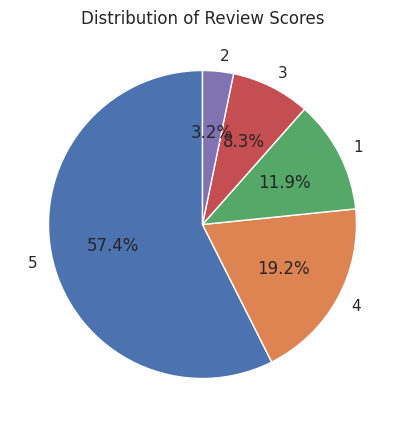

In [21]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_order_reviews_dataset.csv']
df2 = dataframes['olist_orders_dataset.csv']
df3 = df1['review_score']
df4 = df2['order_id']

# Calculate the counts of each review score
score_counts = df1['review_score'].value_counts()

# Calculate the percentages of each score
score_percentages = (score_counts / score_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(score_percentages, labels=score_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review Scores')
plt.show()

# Filter df1 for review scores 1 and 2 to create filtered_df1
filtered_df1 = df1[df1['review_score'].isin([1, 2])]

# Extract the order_id from the filtered DataFrame
low_rating_order_ids = filtered_df1['order_id'].tolist()

# Merge filtered_df1 with df2 to get customer_id
low_r_customer = pd.merge(filtered_df1[['order_id']], df2[['order_id', 'customer_id']], on='order_id', how='left')

# Get the unique customer IDs
low_r_customer_ids = low_r_customer['customer_id'].unique().tolist()

# Print or use low_r_customer_ids
#print(low_r_customer_ids)
#number_of_1s_or2s=len(low_r_customer_ids)
#print(number_of_1s_or2s)
#print(score_counts)


##**Segment 2 - Best Customers (By value of orders)**

This analysis highlights the top 15 customers with the highest total order costs, calculated by combining the price of the purchased items and the associated transportation cost ('freight value').

**Business Recommendation:**

Offering discounts to these high-value customers could be a strategic move. Since they frequently place large orders, providing them with exclusive discounts or loyalty incentives would not only demonstrate appreciation for their business but also encourage them to continue spending—and potentially increase their order sizes. This approach can strengthen customer loyalty and maximize revenue in the long term.

Additionally, personalized offers or tiered discounts based on their spending patterns could enhance engagement and make them feel even more valued by the business. Let me know if you'd like help creating specific plans for such offers!

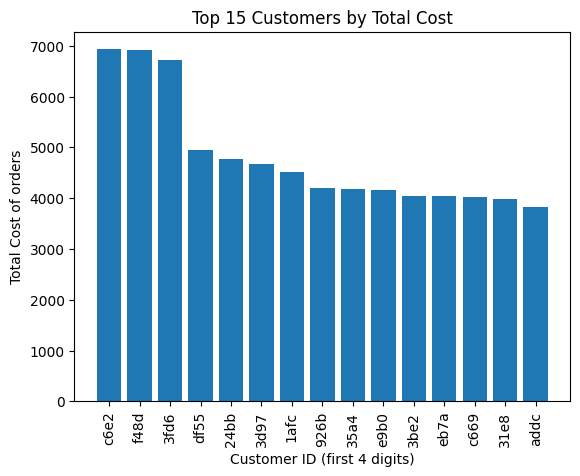

In [10]:
order_items = dataframes['olist_order_items_dataset.csv']
orders = dataframes['olist_orders_dataset.csv']  # Needed for linking 'order_id' to 'customer_id'
customers = dataframes['olist_customers_dataset.csv']

# Ensure 'price' and 'freight_value' are numeric
order_items['price'] = order_items['price'].astype(float)
order_items['freight_value'] = order_items['freight_value'].astype(float)

# Calculate total cost
order_items['total_cost'] = order_items['price'] + order_items['freight_value']

# Sort by 'total_cost' in descending order
n_sorted = order_items.sort_values(by=['total_cost'], ascending=False)

# Merge 'order_items' with 'orders' to get 'customer_id'
merged_orders = pd.merge(n_sorted, orders[['order_id', 'customer_id']], on="order_id", how="left")

# Merge with 'customers' dataset to add 'customer_id' details
final_data = pd.merge(merged_orders, customers, on="customer_id", how="left")


plt.bar(final_data['customer_id'].head(15), final_data['total_cost'].head(15))
plt.xlabel('Customer ID (first 4 digits)')
plt.ylabel('Total Cost of orders')
plt.title('Top 15 Customers by Total Cost')
plt.xticks(plt.xticks()[0], [str(tick)[:4] for tick in final_data['customer_id'].head(15)], rotation=90)

plt.show()

##**Customer Segementation by Location**

This is a population density map showing the geographic distribution of customers across various states in Brazil. The map reveals that São Paulo ('SP') and Rio de Janeiro ('RJ') have the highest concentration of customers, making them the most densely populated states in terms of customer presence.

**Business Recommendations:**

Establish Local Branches: Given the high customer density in São Paulo and Rio de Janeiro, opening local branches or physical stores in these states would be a strategic decision. This would enhance accessibility for customers, potentially boosting sales and strengthening the brand’s presence.

Targeted Marketing Campaigns: A focused marketing strategy aimed at these two states could further capitalize on the existing interest from customers. Leveraging localized promotions and advertisements tailored to the preferences of customers in these regions could drive engagement and increase conversion rates.

Expand Marketing Efforts to Other States: If the strong customer base in São Paulo and Rio de Janeiro is the result of effective marketing campaigns, it would be worth exploring similar strategies in states with lower customer density. Targeting these less-populated areas could broaden the customer base and support business growth on a national scale.

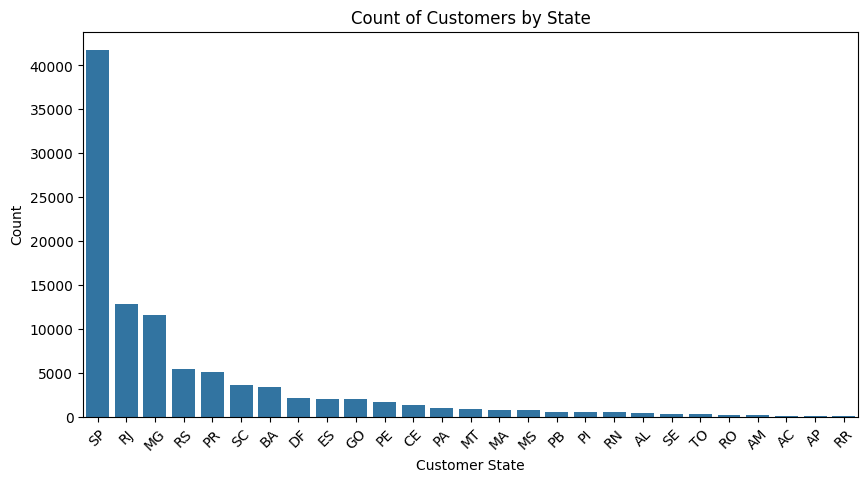

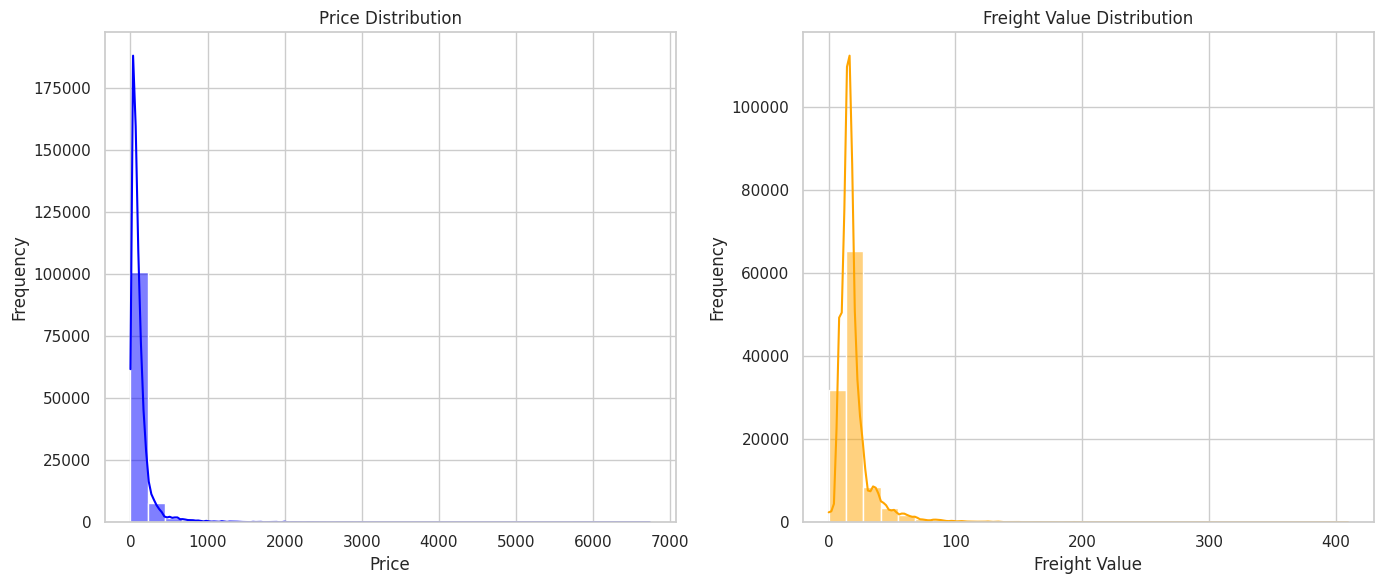

In [11]:
datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Plotting based on the dataset - INDENTED INSIDE THE LOOP
        if filename == 'olist_customers_dataset.csv':
            # Bar chart for customer count by state
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index)
            plt.title('Count of Customers by State')
            plt.xlabel('Customer State')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif filename == 'olist_geolocation_dataset.csv':
            state_counts = dataframes[filename]['geolocation_state'].value_counts().reset_index()
            state_counts.columns = ['state', 'count']

            # URL to a GeoJSON file for Brazilian states
            brazil_geojson_url = (
                "https://raw.githubusercontent.com/codeforamerica/click_that_hood/"
                "master/public/data/brazil-states.geojson"
            )

            # Create the Choropleth Map
            fig = px.choropleth(
                state_counts,
                geojson=brazil_geojson_url,
                locations='state',  # State abbreviations (e.g., "SP")
                featureidkey='properties.sigla',  # Key in GeoJSON matching state abbreviations
                color='count',  # Values to color
                color_continuous_scale='Blues',
                scope='south america',  # Focus on Brazil
                labels={'count': 'Number of Zip Codes'},
                title='Geolocation Density by Brazilian State'
            )

            # Adjust map layout
            fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
            fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
            fig.show()

        elif filename == 'olist_order_items_dataset.csv':
            # Box plot for price distribution
            # plt.figure(figsize=(10, 5))
            # sns.boxplot(x=df['price'])
            # plt.title('Box Plot of Prices')
            # plt.xlabel('Price')
            # plt.grid()
            # plt.show()

            sns.set(style="whitegrid")
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            # Histogram for Price
            sns.histplot(dataframes[filename]['price'], bins=30, kde=True, ax=axes[0], color='blue')
            axes[0].set_title('Price Distribution')
            axes[0].set_xlabel('Price')
            axes[0].set_ylabel('Frequency')
            # Histogram for Freight Value
            sns.histplot(dataframes[filename]['freight_value'], bins=30, kde=True, ax=axes[1], color='orange')
            axes[1].set_title('Freight Value Distribution')
            axes[1].set_xlabel('Freight Value')
            axes[1].set_ylabel('Frequency')

            plt.tight_layout()
            plt.show()

Repeat Customers: 2997
One-Time Customers: 93099


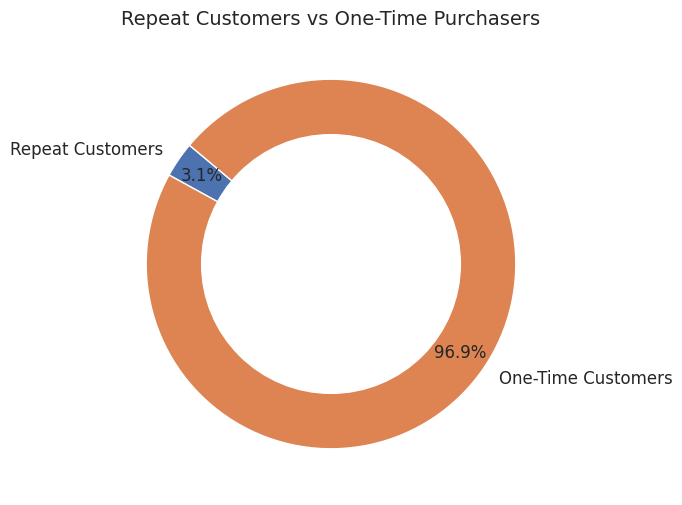

In [12]:

datasets_path = '/content/drive/MyDrive/olist_data' # Define your datasets path

# Load datasets using the correct path
customers_df = pd.read_csv(os.path.join(datasets_path, 'olist_customers_dataset.csv')) # Use os.path.join to create the full file path
orders_df = pd.read_csv(os.path.join(datasets_path, 'olist_orders_dataset.csv')) # Use os.path.join to create the full file path


# Merge datasets to link customers with orders
customer_orders_df = orders_df.merge(customers_df, on="customer_id", how="left")

# Count the number of purchases per customer
customer_order_counts = customer_orders_df['customer_unique_id'].value_counts()

# Categorize customers
repeat_customers_count = (customer_order_counts > 1).sum()
one_time_customers_count = (customer_order_counts == 1).sum()

# Print results
print(f"Repeat Customers: {repeat_customers_count}")
print(f"One-Time Customers: {one_time_customers_count}")

# Create a donut chart for repeat vs. one-time customers
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [repeat_customers_count, one_time_customers_count]
labels = ['Repeat Customers', 'One-Time Customers']

# Create the pie chart with a donut effect
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.85
)

# Format the text
for text in texts + autotexts:
    text.set_fontsize(12)

# Add a circle in the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Repeat Customers vs One-Time Purchasers', fontsize=14)

# Display the chart
plt.show()



**Segment 4 - Product Categories**

This analysis is to identify the the product categories with the best sales. It first merges product data with category translations and order items to analyze spending by product category. It then calculates total spending and average order value per category, the result displayed the top 10 categories in bar chart using Seaborn bar plots. To analyze cross-category buying patterns, it links order and ccustomer data to get location details. After that, it groups spending by product category and state, filtering the top 10 states and the top 5 product categories in those states. The result was also been displayed using bar plot, showing the top categories spending across states.


*   Top 10 Categories by Total Spending

    This chart shows the product categories that generate the highest revenue for Olist. "Health & Beauty" and "Watches & Gifts" lead in total spending, followed by categories like "Bed, Bath & Table" and "Sports & Leisure." This could indicate that consumer spend more on personal care and lifestyle products.

*   Top 10 Categories by Average Order Value

    This charts highlights categories with highest spending per order. "Computers" got the highest value, followed by "Small Appliances" and "Home Applicances". This suggests that while these categories may have fewer transactions, they involve high-value purchases.

*   Top 5 Product Categories in Top 10 States

    This chart illustrates the total spending across different product categories in listed states. The result suggests that "computers_accesories", "health_beauty" are the highest spending categories among all, while "sports_leisure", and "watches_gifts" aslo showing significaant contributions. The visualisation highlights regional spending patterns, with certain states like SP and RJ leading.  


**Business Suggestions**

*   Expanding High-Spending Categories

    Since Health & Beauty and Watches & Gifts have the highest total spending, consider adding more product variations, bundling offers and premium options. Also, partnering with influencers and lifestyle bloggers could help to increase visibility.

*   Improve Conversion for High-AOV Categories

    Computers, Home Appliances, and Musical Instruments have high order values, so the product page should have: detailed explanations, video demonstrations and competitive pricing & promotions. Also, customer reviews is also a customer purchase factor. Therefore, encorage customer to leave reviews by providing loyalty points or dicounts whenever they leave reviews so that there is a feedback loop.

*   Expand Payment and Financing Options

    Offer installments, buy-now-pay-later (BNPL), or EMI options also attract customers to buy high value categories computers,small appliances and home applicances. In the meantime, Olist could provide customer benefits like no interest installments to increase customer desires to make purchase.

*   Regional Targeting

    Since SP has the highest spending, Olist should put more resources on lauching marketing campaigns specifically on customers in SP. Besdies that, Olist could do inventory distribution to match local preferences

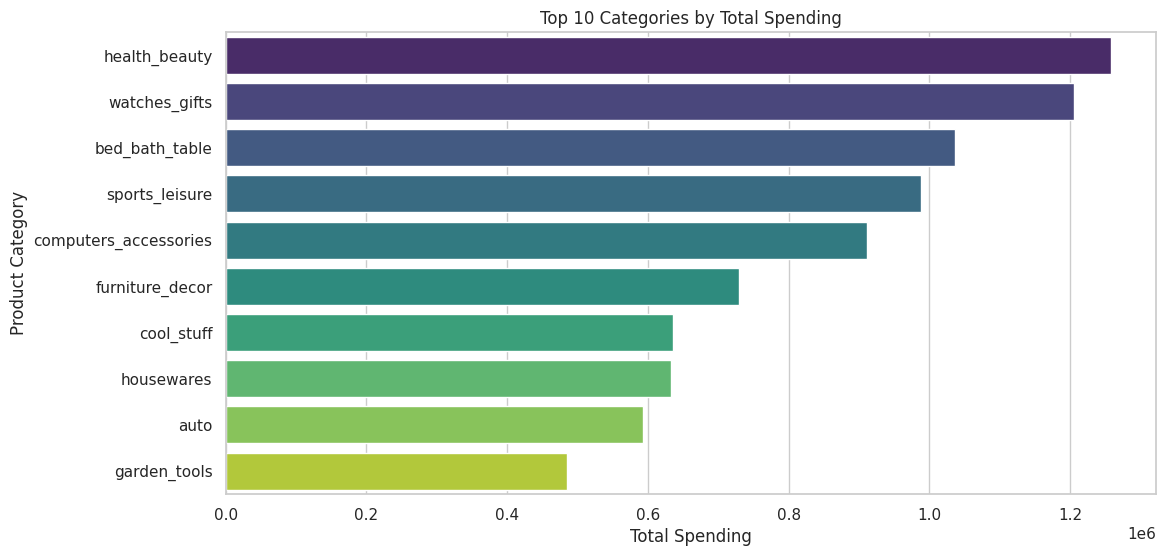

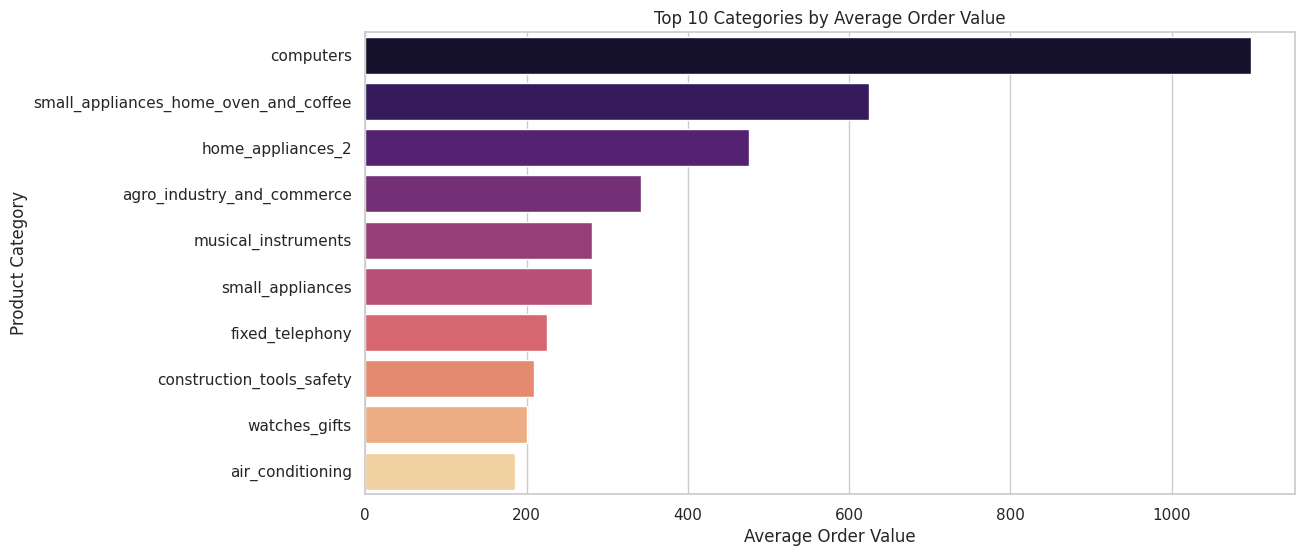

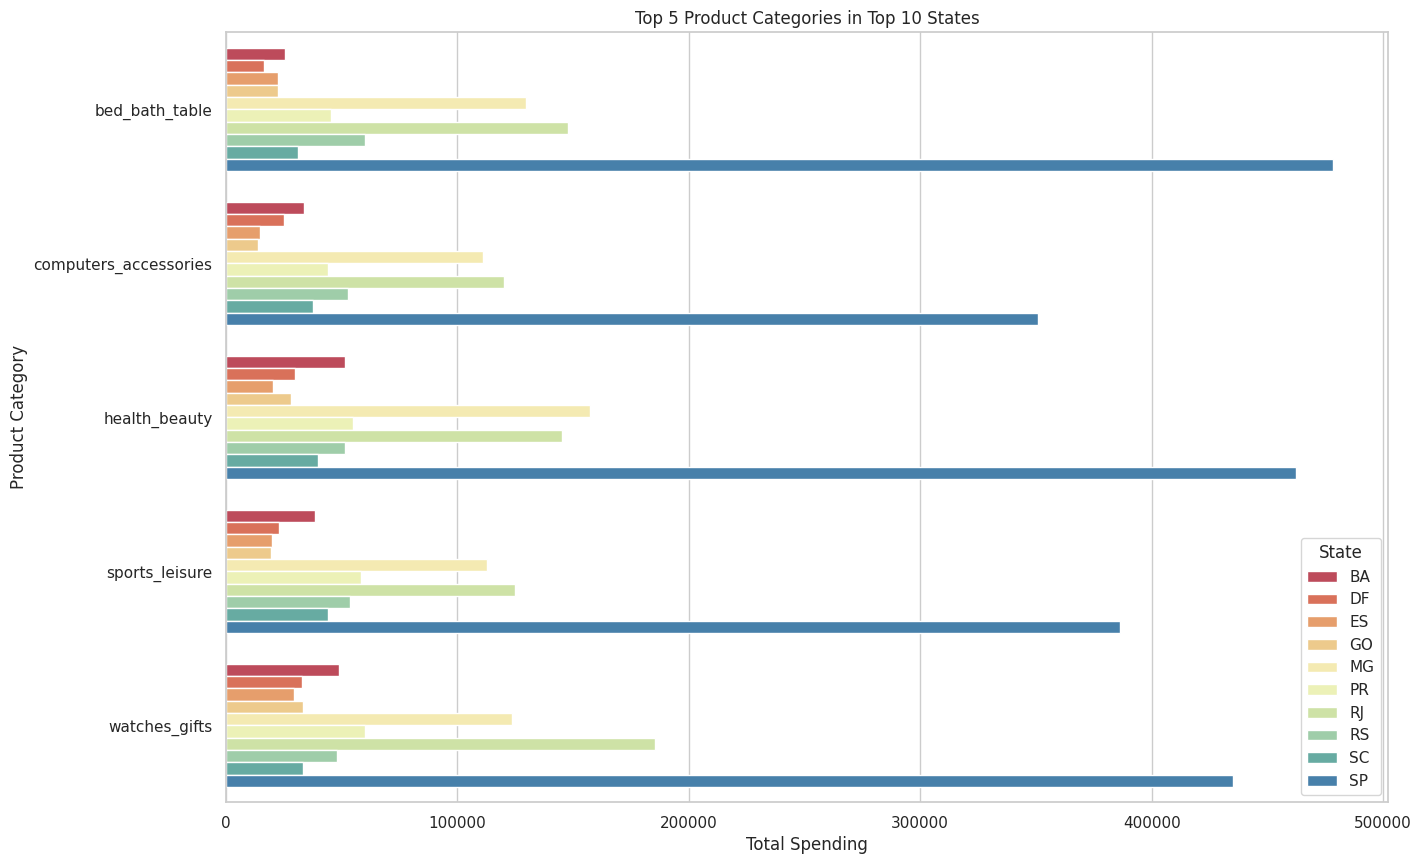

In [13]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

order_items = dataframes['olist_order_items_dataset']
products = dataframes['olist_products_dataset']
category_translation = dataframes['product_category_name_translation']
orders = dataframes['olist_orders_dataset']
customers = dataframes['olist_customers_dataset']

# Merge product data with category translation
products = products.merge(category_translation, left_on='product_category_name', right_on='ï»¿product_category_name', how='left')
products = products.drop(columns=['ï»¿product_category_name'])
# Merge with order items to get order-level data
order_data = order_items.merge(products, on='product_id', how='left')

# Calculate total spending per category
category_spending = order_data.groupby('product_category_name_english')['price'].sum().reset_index()
category_spending = category_spending.sort_values(by='price', ascending=False)

# Average order value per category
category_avg_order = order_data.groupby('product_category_name_english')['price'].mean().reset_index()
category_avg_order = category_avg_order.sort_values(by='price', ascending=False)

# Visualisations
#### Total Spending by Category - Identify which categories generate the most revenue.####
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', hue='product_category_name_english', data=category_spending.head(10), palette='viridis', legend=False)
plt.title('Top 10 Categories by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.show()

#### Average Order Value by Category - See which categories have the highest average spending.####
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', hue='product_category_name_english',data=category_avg_order.head(10), palette='magma', legend=False)
plt.title('Top 10 Categories by Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Product Category')
plt.show()


##### Cross-Category Buying Patterns  - To analyze if certain categories are more popular in specific regions or cities.#####


# Link with order and customer data to get location details
order_data = order_data.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')
order_data = order_data.merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')


# Group by category and state to calculate total spending per state
category_state_spending = order_data.groupby(['product_category_name_english', 'customer_state'])['price'].sum().reset_index()

# Get top 10 states with the highest spending
top_states = category_state_spending.groupby('customer_state')['price'].sum().sort_values(ascending=False).head(10).index

# Filter for top states only
top_state_data = category_state_spending[category_state_spending['customer_state'].isin(top_states)]

# Get top 5 product categories in these states
top_categories = top_state_data.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(5).index
top_state_category_data = top_state_data[top_state_data['product_category_name_english'].isin(top_categories)]

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='price', y='product_category_name_english', hue='customer_state', data=top_state_category_data, palette='Spectral')
plt.title('Top 5 Product Categories in Top 10 States')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.legend(title='State')
plt.show()

**Segment 5 - Delivery Time**

The code analyzes the impact of delivery delays on customer satisfaction using the Olist e-commerce dataset.After loading the datasets, the date columns related to order timestamps are converted to datetime format, and new columns are created to calculate actual delivery time, estimated delivery time, and delivery delay. The orders and reviews datasets are merged to associate review scores with delivery performance. The code then groups data by review scores to compute average delivery times and delays for different satisfaction levels. Three visualizations are generated: (1) a histogram showing the distribution of delivery delays, where a red dashed line indicates on-time delivery, (2) a bar chart displaying the relationship between average delivery time and customer review scores, and (3) a boxplot illustrating how delivery delays correlate with review scores.

1.   Distribution of Delivery Delays

      The charts shows the frequency delays in days, with most deliveries concentrated around the "On-time delivery" mark. However, there are significant outliers, with delays extending up to 200 days, though these are less frequent. The distribution is right-skewed, meaning while most orders arrive on time or slightly late, a small portion experiences extreme delays.

2.   Delivery Delays vs. Customer Satisfaction

      This scatter plot examines the relationship between delivery delays (in days) and customer review scores (1-5). As expected, shorter or on-time deliveries correlate with higher review scores , while longer delays lead to lower satisfaction. This shows that customer highly sensitive to delays. Even minor delays could impact their sastisfaction.

3.   Impact of Delivery Time on Customer Satisfaction

      The bar chart illustrates how average actual delivery times affect review scores. Orders with faster delivery times consistently receive the highest ratings, while slower deliveries (10+ days) result in lower scores. The steep decline in satisfaction beyond 5 days highlights the importance of speed in customer experience.

**Business Suggestions**

*   Improve Delivery Speed to Boost Satisfaction

    Olist could offer tiered shipping options like provide expetied shipping  for customers willing to pay extra, while optimizing standard shipping to stay under 5 days. Olist could manage their warehous localization by placing warehouses closer to high order density places to minimize transit times.Lastly, provide live updates on delivery status to manage customer expectations.

   
*   Optimize Logistics to Reduce Extreme Delays

    To resolve this issue, the first step is to do investigation. Investigate why some deliveries experience extreme delays and address them. Moreover, OList could come upn with some contigency plans. For instance, develop backup routes or alternative suppliers for high-risk shipments.

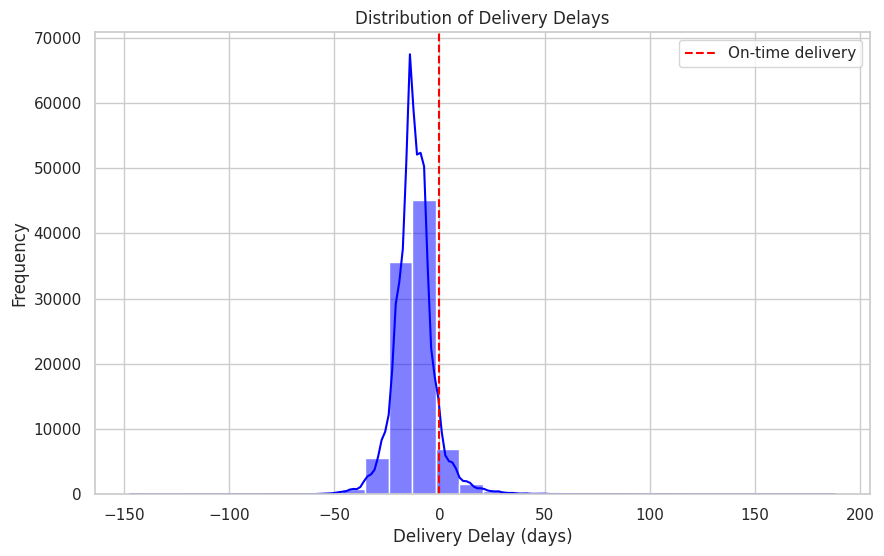

<ipython-input-14-c6bde4784d47>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




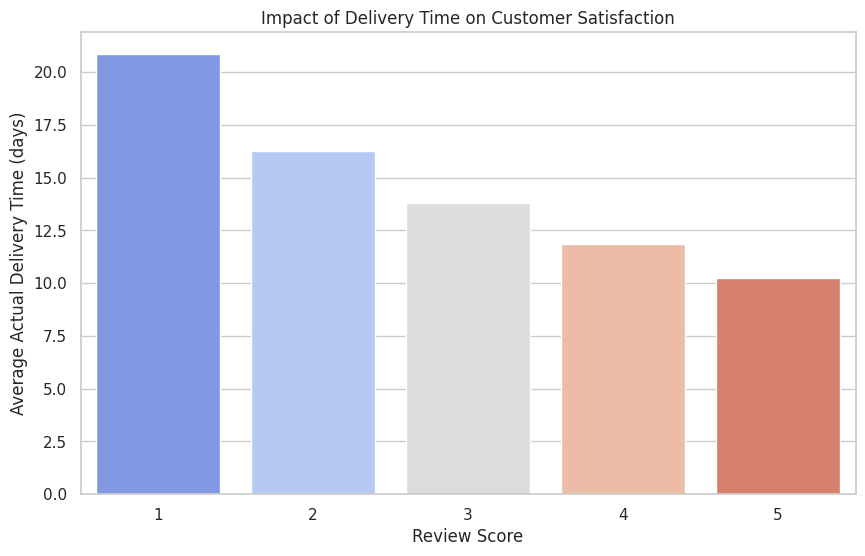

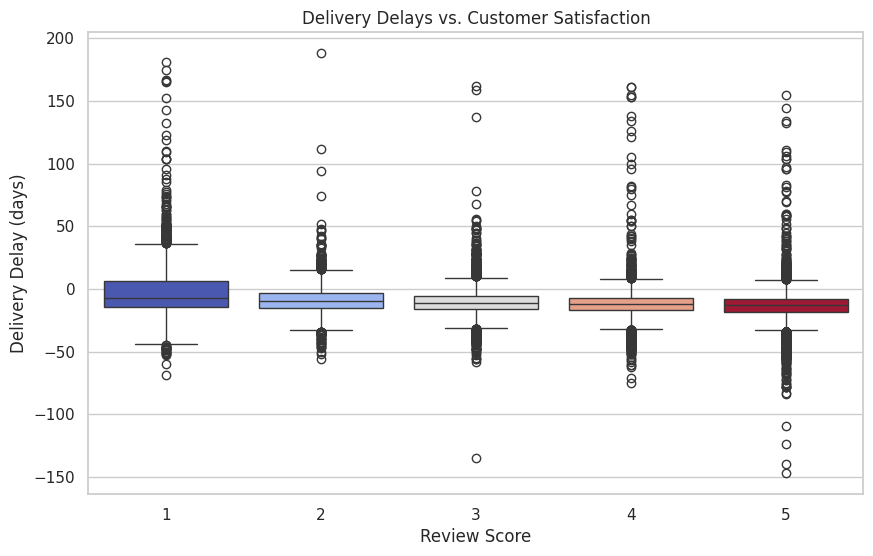

In [14]:
# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

orders_df = dataframes['olist_orders_dataset']
reviews_df = dataframes['olist_order_reviews_dataset']

date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])


orders_df['actual_delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['estimated_delivery_time'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

orders_reviews_df = pd.merge(orders_df, reviews_df[['order_id', 'review_score']], on='order_id', how='inner')


review_delivery_analysis = orders_reviews_df.groupby('review_score').agg(
    avg_actual_delivery=('actual_delivery_time', 'mean'),
    avg_estimated_delivery=('estimated_delivery_time', 'mean'),
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()


# Plot Delivery Delays Distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['delivery_delay'], bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='dashed', label='On-time delivery')
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot Average Delivery Time by Review Score
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='avg_actual_delivery', data=review_delivery_analysis, palette='coolwarm')
plt.title('Impact of Delivery Time on Customer Satisfaction')
plt.xlabel('Review Score')
plt.ylabel('Average Actual Delivery Time (days)')
plt.show()

# Scatter plot for Delivery Delay vs. Review Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_delay', data=orders_reviews_df,
            hue='review_score', palette='coolwarm', legend=False)
plt.title('Delivery Delays vs. Customer Satisfaction')
plt.xlabel('Review Score')
plt.ylabel('Delivery Delay (days)')
plt.show()

# Task 3 Recommender System

##**Steps Taken:**

Our approach to building the recommender system is centered around content-based filtering, which focuses on analyzing a user’s past purchasing behavior to suggest relevant products. This method personalizes recommendations by examining the features and attributes of products a customer has shown interest in and finding similar items that align with their preferences.

###**Step 1: Analyzing Customer Preferences**
The first step in our recommendation process is to retrieve the customer’s purchase history and identify the products they have rated highly. Specifically, we focus on products that have received a rating of 4 stars or higher, as this indicates a strong preference or satisfaction with the product. By filtering for high-rated products, we ensure that the recommendations are aligned with the user’s positive experiences, rather than including products that may not have met their expectations.

###**Step 2: Identifying Purchased Products and Categories**
Once we have identified the highly-rated products, we extract the order IDs associated with these purchases. This allows us to pinpoint the exact items a customer has bought and enjoyed. From these products, we analyze their categories, attributes, and features to gain insights into the customer’s interests. For example, if a customer frequently purchases and rates highly items in the category 'furniture_decor', we infer that they have a strong interest in furniture decor.

###**Step 3: Generating Recommendations Based on Similar Categories**
With an understanding of the customer’s preferred product categories, we then recommend products that belong to similar or related categories. This ensures that our recommendations are relevant and aligned with the customer’s established interests.




##**Business Justification:**

Implementing content-based filtering for product recommendations offers significant advantages for both the business and the customer.

###**1. Enhancing Customer Experience**
A well-designed recommendation system creates a seamless and intuitive shopping experience. Customers appreciate when a platform understands their preferences and suggests items that align with their needs. By recommending products similar to those they have already enjoyed, we provide them with a curated selection of relevant options, reducing the time and effort needed to discover new products.

###**2. Increasing Customer Engagement and Retention**
Personalized recommendations encourage customers to explore more products within their favorite categories. When users feel that the system understands their preferences, they are more likely to return to the platform for future purchases. This enhances customer loyalty and retention, leading to higher lifetime value per customer.

###**3. Driving Sales and Revenue Growth**
From a business perspective, recommending products that align with a customer’s preferences increases the likelihood of a purchase. When customers are shown relevant products, they are more inclined to add them to their cart and complete the checkout process. Additionally, content-based filtering can help promote cross-selling and upselling opportunities, as customers may discover premium, complementary, or related products they might not have otherwise considered.

For example, a customer who has purchased high-rated running shoes may be recommended performance socks, fitness trackers, or hydration packs, all of which enhance their experience. This strategy not only improves the customer’s shopping journey but also boosts overall revenue by increasing the average order value.

###**4. Building a Data-Driven Competitive Advantage**
By leveraging customer data to generate personalized recommendations, businesses can gain a competitive edge in the e-commerce space. The ability to analyze customer preferences and deliver tailored suggestions helps differentiate a platform from competitors who may rely on generic or less relevant recommendations. Over time, this data-driven approach strengthens the platform’s ability to adapt to changing customer behaviors and market trends.

Conclusion
Our content-based recommender system ensures that customers receive highly relevant and personalized product suggestions based on their past purchases and preferences. By focusing on products that they have rated positively, we build a recommendation model that is intuitive, customer-centric, and business-driven. The result is an enhanced shopping experience, increased customer engagement, and higher revenue growth, making this approach a valuable asset for any e-commerce platform.

In [19]:
from IPython.display import display, HTML

#3.1 Get the purchase history first
#Enter the customer who you want to see their recommendations for
example_customer=("f48d464a0baaea338cb25f816991ab1f")

folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

df1 = dataframes['olist_order_reviews_dataset']
df2 = dataframes['olist_orders_dataset']
df3 = dataframes['olist_order_items_dataset']
df4 = dataframes['olist_products_dataset']
df5 = dataframes['product_category_name_translation']
df6 = dataframes['olist_customers_dataset']
df7 = dataframes['olist_order_reviews_dataset']

# Merge the necessary dataframes
merged_df = df6.merge(df2, on='customer_id', how='inner')
merged_df = merged_df.merge(df3, on='order_id', how='inner')

# Filter for the example customer
customer_orders = merged_df[merged_df['customer_id'] == example_customer]


order_ids_list = []
if not customer_orders.empty:
  order_ids = customer_orders['order_id'].unique()
  print(f"Order IDs for customer {example_customer}:")
  for order_id in order_ids:
    order_ids_list.append(order_id)
    print(order_ids_list)
else:
  print(f"No orders found for customer {example_customer}")


#3.2 Factor in the Reviews
#Use the review score to either dampen the recommendation of the category of product or promote it

# ... (previous code to create order_ids_list) ...

review_scores = {}  # Dictionary to store order_id and review_score_category

for order_id in order_ids_list:
    # Filter df7 (reviews) for the current order_id
    review_for_order = df7[df7['order_id'] == order_id]

    # Check if a review exists for the order
    if not review_for_order.empty:
        review_score = review_for_order['review_score'].iloc[0]  # Get the review score

        # Store 0 or 1 based on review score
        if review_score < 3:
            review_scores[order_id] = 0  # Store 0 for negative review
        else:
            review_scores[order_id] = 1  # Store 1 for positive review
    else:
        review_scores[order_id] = -1 # Store -1 if no review found

# Print the review_scores dictionary
print(review_scores)
product_ids_for_orders = df3[df3['order_id'].isin(order_ids_list)]['product_id'].unique()

print("Product IDs associated with the orders:", product_ids_for_orders)
product_categories_for_orders = df4[df4['product_id'].isin(product_ids_for_orders)]['product_category_name'].unique()

# Print the product categories
print("Product categories associated with the orders:", product_categories_for_orders)

#3.3 Factor in Product Details
#Things like product dimension or price should be used to decide what to recommend to the user

# Merge product data with order items to include price
df4_with_price = df4.merge(df3[['product_id', 'price']], on='product_id', how='left')

# Recommend new products (same category, not previously bought)
recommended_products = df4_with_price[
    (df4_with_price['product_category_name'].isin(product_categories_for_orders)) |
    (df4_with_price['product_id'].isin(product_ids_for_orders))
]

# Sort recommendations by price similarity or highest reviews (if available)
recommended_products = recommended_products.sort_values(by='price', ascending=True).head(5)


# Ensure we don't sample more than available products

if num_recommendations > 0:
    top_recommendations = recommended_products.sample(num_recommendations)
    print(f"\nRecommended Products for user: {example_customer}\n")

    # Convert DataFrame to HTML table
    table_html = top_recommendations[['product_id', 'product_category_name', 'price']].to_html(index=False)

    # Display the HTML table
    display(HTML(table_html))
else:
    print("No new products found to recommend in the same category.")


Order IDs for customer f48d464a0baaea338cb25f816991ab1f:
['fefacc66af859508bf1a7934eab1e97f']
{'fefacc66af859508bf1a7934eab1e97f': 0}
Product IDs associated with the orders: ['69c590f7ffc7bf8db97190b6cb6ed62e']
Product categories associated with the orders: ['pcs']

Recommended Products for user: f48d464a0baaea338cb25f816991ab1f



product_id,product_category_name,price
e4d6002d3e034177ea1f31aa222cc722,pcs,560.0
2fde77c0db49f38e0c0b2065f984f452,pcs,530.0
e4d6002d3e034177ea1f31aa222cc722,pcs,560.0
437c27398475365e3103e091ce518c6f,pcs,580.0
65f37bbbadf973d2660dc911af121406,pcs,34.5


# Task 4 Evaluation

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Identify all future orders placed by the customer
if 'customer_id' in df2.columns and 'order_id' in df2.columns:
    customer_future_orders = df2[df2['customer_id'] == example_customer]['order_id'].unique()
else:
    print("Error: 'customer_id' or 'order_id' not found in orders dataset.")
    customer_future_orders = []

# Step 2: Find products in those future orders
if len(customer_future_orders) > 0 and 'order_id' in df3.columns and 'product_id' in df3.columns:
    future_orders = df3[df3['order_id'].isin(customer_future_orders)]['product_id'].unique()
else:
    print("⚠️ Warning: No future purchases found for this customer. Evaluation may be inaccurate.")
    future_orders = []

# Step 3: Verify recommended products have 'product_id'
if 'product_id' not in recommended_products.columns:
    print("Error: 'product_id' not found in recommended_products.")
else:
    # Step 4: Assign ground truth labels
    recommended_products = recommended_products.copy()  # Prevent SettingWithCopyWarning
    recommended_products['actual'] = recommended_products['product_id'].apply(lambda x: 1 if x in future_orders else 0)

    # Step 5: Extract true labels (ground truth) and predicted labels (recommendations)
    y_true = recommended_products['actual'].values  # Actual purchases (Ground Truth)
    y_pred = [1] * len(y_true)  # All recommended products are positive predictions

    # Step 6: Compute Metrics (only if we have valid data)
    if sum(y_true) > 0:  # Ensure we have at least one true positive case
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)

        # Step 7: Display Results
        print(f"\n📊 **Evaluation Metrics for Recommender System** 📊")
        print(f"✅ Precision: {precision:.2f}")
        print(f"✅ Recall: {recall:.2f}")
        print(f"✅ F1 Score: {f1:.2f}")
        print(f"✅ AUC Score: {auc:.2f}")
    else:
        print("\n⚠️ Not enough positive samples for evaluation. Precision, Recall, and AUC may not be meaningful.")



⚠️ Not enough positive samples for evaluation. Precision, Recall, and AUC may not be meaningful.


In [ ]:
# Step 1: Get all future purchases for each customer
future_orders_df = df2.merge(df3, on='order_id', how='left')[['customer_id', 'product_id']]

# Step 2: Convert to a dictionary {customer_id: [list of product_ids]}
customer_future_orders = future_orders_df.groupby('customer_id')['product_id'].apply(list).to_dict()

# Step 3: Evaluate for all customers at once
total_y_true = []
total_y_pred = []

for customer, future_products in customer_future_orders.items():
    recommended_products['actual'] = recommended_products['product_id'].apply(lambda x: 1 if x in future_products else 0)
    y_true = recommended_products['actual'].values
    y_pred = [1] * len(y_true)  # All recommended products are positive predictions

    total_y_true.extend(y_true)
    total_y_pred.extend(y_pred)

# Compute evaluation metrics
if sum(total_y_true) > 0:
    precision = precision_score(total_y_true, total_y_pred)
    recall = recall_score(total_y_true, total_y_pred)
    f1 = f1_score(total_y_true, total_y_pred)
    auc = roc_auc_score(total_y_true, total_y_pred)

    print("\n📊 **Overall Recommender System Evaluation** 📊")
    print(f"✅ Precision: {precision:.2f}")
    print(f"✅ Recall: {recall:.2f}")
    print(f"✅ F1 Score: {f1:.2f}")
    print(f"✅ AUC Score: {auc:.2f}")
else:
    print("\n⚠️ Not enough positive samples across all customers for evaluation.")


# Task 5 - Sentiment Analysis

**5.1 - Reviews**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import nltk
import os
import string

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

# Extract the reviews DataFrame
reviews_df = dataframes['olist_order_reviews_dataset']

# 🚨 Drop rows where review_comment_message is empty or NaN
Updatedreviews_df = reviews_df.dropna(subset=['review_comment_message'])

# Define a function to classify sentiment based on VADER scores
def classify_sentiment(text):
    if pd.isna(text):  # Handle missing values
        return 'Neutral'
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment classification function to the review_comment_message column
Updatedreviews_df['sentiment'] = Updatedreviews_df['review_comment_message'].apply(classify_sentiment)

# Display the sentiment distribution counts
sentiment_counts = Updatedreviews_df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution (%):")
print(sentiment_counts)

# Plot sentiment distribution as a pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Sentiment Distribution of Customer Reviews')
plt.ylabel('')
plt.show()

# -----------------------------
# GENERATE TOP 20 PHRASES
# -----------------------------

# Function to extract n-grams
def get_ngrams(text, n=2):
    if pd.isna(text):
        return []
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    n_grams = ngrams(words, n)  # Create n-grams
    return [' '.join(gram) for gram in n_grams]  # Join n-gram tuple into a string

# Get top n-grams (bigrams) for each sentiment
def get_top_ngrams(text_list, n=2):
    all_ngrams = []
    for text in text_list:
        all_ngrams.extend(get_ngrams(text, n))
    counter = Counter(all_ngrams)
    top_ngrams = dict(counter.most_common(20))  # Get top 10 most common n-grams
    return top_ngrams

# Get top 10 bigrams for each sentiment category
positive_ngrams = get_top_ngrams(Updatedreviews_df.loc[Updatedreviews_df['sentiment'] == 'Positive', 'review_comment_message'].dropna(), n=2)
negative_ngrams = get_top_ngrams(Updatedreviews_df.loc[Updatedreviews_df['sentiment'] == 'Negative', 'review_comment_message'].dropna(), n=2)
neutral_ngrams = get_top_ngrams(Updatedreviews_df.loc[Updatedreviews_df['sentiment'] == 'Neutral', 'review_comment_message'].dropna(), n=2)

# Create WordCloud objects from top n-grams
positive_wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='Greens').generate_from_frequencies(positive_ngrams)
negative_wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='Reds').generate_from_frequencies(negative_ngrams)
neutral_wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='Blues').generate_from_frequencies(neutral_ngrams)

# Plot the word clouds in 3 rows and 1 column
fig, ax = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

# Positive reviews
ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Reviews - Top 20 Bigrams', fontsize=16)
ax[0].axis('off')

# Negative reviews
ax[1].imshow(negative_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Reviews - Top 20 Bigrams', fontsize=16)
ax[1].axis('off')

# Neutral reviews
ax[2].imshow(neutral_wordcloud, interpolation='bilinear')
ax[2].set_title('Neutral Reviews - Top 20 Bigrams', fontsize=16)
ax[2].axis('off')

plt.tight_layout()  # Ensure no overlapping
plt.show()




# Output Interpretations of Task 5.1

**Observations**

1. Sentiment Distribution of Customer Reviews

    The pie chart shows the distribution of customer reviews by sentiment score. A significant majority of 56.7% of the reviews are positive, shows that more than half of the customers are satisfied with their purchasing experience. About 27.2% of the reviews are neutral, suggesting that quite  numbers of customer had an average of mixed experience. Meanwhile, 16.3% of the reviews are negative, which highlights that a smaller but noticeable proportion of customers encountered issues or were dissatisfied.

2. Positive Reviews – Top 20 Bigrams

    The word cloud highlights the common phrases mentioned by satisfied customers. Phrases such as "product delivered," "good product," "fast delivery," "ahead schedule," and "well packaged" appear frequently, indicating that customers appreciate timely delivery, good product quality and secure packaging. Moreover, phrases like "fast delivery" and "ahead schedule" appear frequently, which shows that quick and reliable delivery is also a factor of positive customer satisfaction. Additionally, mentions of "good product" and "quality product" reflect customer satisfaction with the product itself. This indicates that maintaining consistent delivery times and product quality will be crucial in sustaining high customer satisfaction levels.

3. Negative Reviews – Top 20 Bigrams

    This word cloud reveals the common issues stated by unsatisfied customers. Frequently mentioned bigrams include "post office," "didn't like," "received product," "product came," and "poor quality." Complaints about the "post office" suggest that delivery issues or delays may be a recurring problem. Mentions of "didn't like" and "poor quality" highlight dissatisfaction with the product itself, indicating potential issues with product consistency or customer expectations not being met. Additionally, phrases like "received product" and "came wrong" suggest that customers may have received incorrect or damaged products.

4. Neutral Reviews – Top 20 Bigrams

    The word cloud shows the most common bigrams found in neutral customer reviews. The most common phrases are "product delivered," "received product," "delivery time," and "fast delivery," indicating that many reviews focus on delivery experiences.However, phrases like "didn’t receive," "haven’t received," and "still waiting" suggest that some customers experienced delays or non-delivery issues. Finally, there is also some positive terms like "ahead schedule" and "post office" imply that some customers are also content on the early deliveries and postal service involvement.


**Business Suggestions**

1. Enhance Logistics & Delivery Services

    *   Address Late Deliveries & Non-Delivery Issues

        Partnering with more reliable logistics providers, implementing real-time tracking, and setting clearer expectations for delivery timelines can reduce frustration.

    *   Improve Post Office & Last-Mile Delivery Efficiency

        Collaborating directly with postal services, exploring alternative couriers, and implementing a "preferred delivery partner" selection at checkout can help mitigate this issue.

2. Improve Product Quality & Consistency

    *   Resolve Issues with Poor Product Quality

        Olist should enforce stricter quality control measures, verify seller authenticity, and introduce a customer feedback loop to improve product listings.

    *   Ensure Accurate Product Descriptions

        Some negative reviews mention "came wrong" or "received product" in an unsatisfactory way, which suggests customers received items that did not match their expectations. To resolve this issue, Sellers should be required to provide detailed, high-quality images, precise product specifications, and accurate size/color descriptions to reduce mismatches.  

3. Reduce Neutral Reviews & Convert Them into Positive Feedback

    *   Engage with Neutral Reviewers & Address Unclear Feedback

        Since quite a number of customers leave neutral reviews, Olist should follow up with these customers through email surveys or customer service touchpoints to understand their hesitation and convert them into promoters.

    *   Enhance Customer Support Responsiveness

        Some neutral reviews contain delivery concerns. Proactive customer support, offering clear tracking updates and rapid issue resolution, can turn neutral experiences into positive ones.

**5.2 Product Price**

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

order_items = dataframes['olist_order_items_dataset']
order_payments = dataframes['olist_order_payments_dataset']
order_reviews = dataframes['olist_order_reviews_dataset']
products = dataframes['olist_products_dataset']
product_category_name_translation = dataframes['product_category_name_translation']

# Merge datasets to get the necessary columns
merged_data = pd.merge(order_items, order_payments, on='order_id')
merged_data = pd.merge(merged_data, order_reviews[['order_id', 'review_score', 'review_comment_message']], on='order_id')

sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score from review text
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis to the review_comment_message column
merged_data['sentiment_score'] = merged_data['review_comment_message'].apply(lambda x: get_sentiment_score(str(x)))

# Define price ranges for categorization
price_bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, 7000]
price_labels = ['<50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-5000', '>5000']
merged_data['price_range'] = pd.cut(merged_data['price'], bins=price_bins, labels=price_labels, right=False)

# Compare sentiment score against price ranges
sentiment_by_price_range = merged_data.groupby('price_range', observed=False)['sentiment_score'].mean().reset_index()

# Plot sentiment score against price ranges
plt.figure(figsize=(10,6))
sns.barplot(x='price_range', y='sentiment_score', data=sentiment_by_price_range)
plt.title('Average Sentiment Score by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Sentiment Score')
plt.show()

filtered_data = merged_data[(merged_data['price'] > 5000) & (merged_data['sentiment_score'] < 0)]

# Step 2: Preprocess the text for keyword extraction (remove punctuation, stopwords, etc.)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    words = text.split()  # Split into words
    stop_words = set(stopwords.words('english'))  # Define stop words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply preprocessing to the review comments
filtered_data = merged_data[(merged_data['price'] > 5000) & (merged_data['sentiment_score'] < 0)].copy()
filtered_data['cleaned_review'] = filtered_data['review_comment_message'].apply(preprocess_text)

# Step 3: Use TF-IDF Vectorizer to extract key phrases
vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 2))  # Use unigrams and bigrams
X = vectorizer.fit_transform(filtered_data['cleaned_review'])

# Get the feature names (words/phrases)
feature_names = vectorizer.get_feature_names_out()

# Get the corresponding TF-IDF scores
tfidf_scores = X.sum(axis=0).A1  # Summing the tf-idf scores for each feature

# Step 4: Sort and extract the top keywords/phrases
keyword_scores = zip(feature_names, tfidf_scores)
sorted_keywords = sorted(keyword_scores, key=lambda x: x[1], reverse=True)

# Extract keywords and their corresponding scores for WordCloud
keywords_dict = dict(sorted_keywords)

# Step 5: Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(keywords_dict)

# Step 6: Display the WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.title('WordCloud of Keywords/Phrases Causing Negative Sentiment (Price > 5000)', fontsize=14)
plt.show()

# Output Interpretations of task 5.2

**Observations**

1. Average Sentiment Score by Price Rnage

    The bar chart illustrates that sentiment is generally positive across lower and mid-range price categories, with the highest satisfaction observed in the $500–$1000 range. However, sentiment declines as product prices increase beyond $2000, with a significant drop in the $2000–$5000 range and a negative sentiment for products priced above $5000. This trend suggests that as the cost of products rises, customer expectations increase, and any issues related to the purchase experience, such as delivery or service, contribute to greater dissatisfaction.

2. WordClouds of Keywords/Phrases Causing Negative Sentiment

    This word cloud highlighting negative sentiment for products priced above $5000, reveals key issues leading to dissatisfaction. The most prominent words include "delay," "address," "delivery," and "returning," indicating that delays in shipping, incorrect delivery addresses, and difficulties with returns are major pain points for customers purchasing high-value items. The presence of "delivery" and "delay" suggests that logistics challenges play a significant role in negative reviews, possibly due to inefficient shipping processes or unmet expectations regarding delivery speed and reliability.

**Business Suggestions**

1. Improve Logistics for High-Priced Products

  Since delays and delivery issues are common complaints for expensive products, consider working with premium shipping partners. Offer a tracking system with real-time updates and estimated delivery times to enhance customer trust. Implement a dedicated customer support team for high-value purchases to handle shipping concerns proactively.

2. Enhance Address Verification and Order Processing
    
  Given the keyword "address" in negative reviews, strengthen address verification systems at checkout to reduce misdeliveries. Introduce an automated address validation feature and allow customers to modify addresses before dispatch.

3. Set Proper Customer Expectations for Delivery

  Customers expect faster and more reliable delivery for expensive products, and unmet expectations result in negative reviews. Clearly communicate expected delivery timelines upfront and offer options for express shipping. If delays occur, send proactive notifications and offer compensation (e.g., discount codes or priority service for the next purchase).

4. Segment Customer Service for High-Value Orders
  
  Provide priority customer service for orders above $5000, ensuring that issues related to delivery, returns, or refunds are resolved faster. Consider a dedicated VIP support channel for high-value customers to enhance their post-purchase experience.

# References